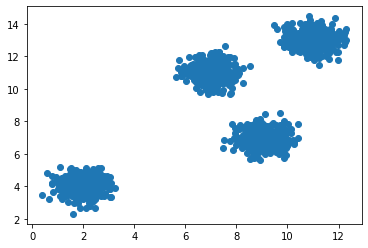

In [48]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.cluster import MeanShift
from sklearn.datasets.samples_generator import make_blobs
center=[[2,4,7,15],[9,7,2,12],[7,11,14,17],[11,13,15,17]]
x,_=make_blobs(n_samples=1500,centers=center,cluster_std=0.5)
plt.scatter(x[:,0],x[:,1])
plt.show()

In [71]:
obj=MeanShift()
obj.fit(x)
labels=obj.labels_
cluster_centers=obj.cluster_centers_
print(cluster_centers)
print(len(np.unique(labels)))
print(len(x))
print(len(labels))
color=10*['r.','b.','g.','m.']#,'c','k','y','m']
print(x[1][0])

[[ 8.99367107 12.02388743 14.48170734 16.98249148]
 [ 9.02977364  6.9964358   2.00670327 12.03507552]
 [ 2.0101699   4.00701755  7.01768695 15.01098085]]
3
1500
1500
2.2182988940600583


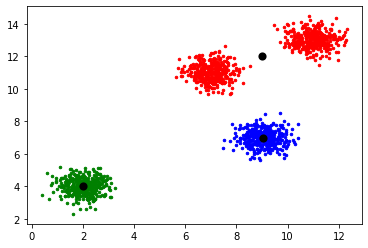

In [72]:
for i in range(len(x)):
    plt.plot(x[i][0],x[i][1],color[labels[i]],markersize=5)
plt.scatter(cluster_centers[:,0],cluster_centers[:,1],marker='o',color='k',s=10,linewidths = 5,zorder = 10)
plt.show()

## second example


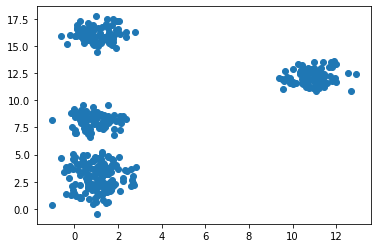

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift
from sklearn.datasets.samples_generator import make_blobs
center=[[1,2,3,4,5],[1,4,9,16,25],[1,8,27,64,125],[1,16,222,444,556],[11,12,177,333,1777]]
x,_=make_blobs(n_samples=400,centers=center,cluster_std=0.7)
plt.scatter(x[:,0],x[:,1])
plt.show()

In [86]:
obj=MeanShift()
obj.fit(x)
labels=obj.labels_
cluster_centers=obj.cluster_centers_
print(len(np.unique(labels)))
print(len(x))
color=10*['r.','b.','g.','k.']

3
500


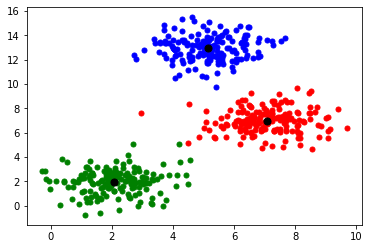

In [88]:
for i in range(len(x)):
    plt.plot(x[i][0],x[i][1],color[labels[i]],markersize=10)
plt.scatter(cluster_centers[:,0],cluster_centers[:,1],marker='o',color='k',s=50,zorder=10)
plt.show()

## third example

In [84]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift
from sklearn.datasets.samples_generator import make_blobs
clusters = [[2, 2, 2], [7, 7, 7], [5, 13, 13]]

x,_=make_blobs(n_samples=500,centers=clusters,cluster_std=0.5)

500


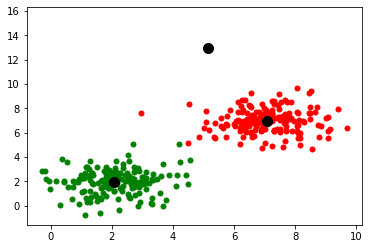

In [94]:
obj=MeanShift()
obj.fit(x)
labels=obj.labels_
cluster_centers=obj.cluster_centers_
color=10*['r.','b','g.','k.']
n_cluster=len(np.unique(labels))
for i in range(len(x)):
    plt.plot(x[i][0],x[i][1],color[labels[i]],markersize=10)
plt.scatter(cluster_centers[:,0],cluster_centers[:,1],color='k',marker='o',s=100,zorder=10)
plt.show()

## fourth example

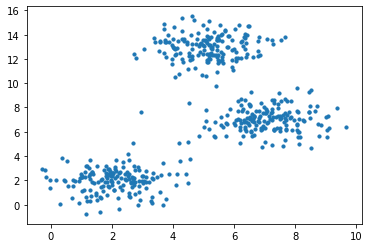

In [97]:
import numpy as np
import matplotlib.pyplot as plt
X = np.array([[1, 2],
              [1.5, 1.8],
              [5, 8 ],
              [8, 8],
              [1, 0.6],
              [9,11],
              [8,2],
              [10,2],
              [9,3],])
#plt.scatter(x[:,0],x[:,1],s=10)
#plt.show()

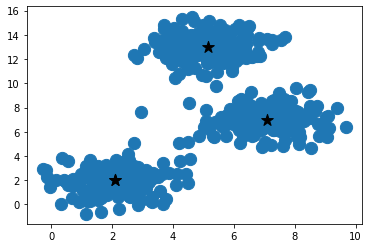

In [100]:
colors = 10*["g","r","c","b","k"]

class Mean_Shift:
    def __init__(self, radius=4):
        self.radius = radius

    def fit(self, data):
        centroids = {}

        for i in range(len(data)):
            centroids[i] = data[i]
        
        while True:
            new_centroids = []
            for i in centroids:
                in_bandwidth = []
                centroid = centroids[i]
                for featureset in data:
                    if np.linalg.norm(featureset-centroid) < self.radius:
                        in_bandwidth.append(featureset)

                new_centroid = np.average(in_bandwidth,axis=0)
                new_centroids.append(tuple(new_centroid))

            uniques = sorted(list(set(new_centroids)))

            prev_centroids = dict(centroids)

            centroids = {}
            for i in range(len(uniques)):
                centroids[i] = np.array(uniques[i])

            optimized = True

            for i in centroids:
                if not np.array_equal(centroids[i], prev_centroids[i]):
                    optimized = False
                if not optimized:
                    break
                
            if optimized:
                break

        self.centroids = centroids
obj = Mean_Shift()
obj.fit(x)
centroids=obj.centroids
plt.scatter(x[:,0],x[:,1],s=150)
for i in centroids:
    plt.scatter(centroids[i][0],centroids[i][1],color='k',marker='*',s=150)
plt.show()